In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [2]:
file_name = "DataOn2025Jan08.xlsx"
dfs = pd.read_excel(file_name, sheet_name=None)
for k in dfs.keys():
    print(f"line name: {k}, number of batches: {dfs[k].shape[0]}")

line name: NES170K07Line2, number of batches: 13081
line name: NES170K07Line1, number of batches: 7447
line name: NES170I08Line1, number of batches: 11319
line name: NES2060C05Line2, number of batches: 2348
line name: NES2060C06Line2, number of batches: 3192
line name: NES3105A07Line1, number of batches: 8435
line name: NES3105A07Line2, number of batches: 8187


In [3]:
def safe_literal_eval(value):
    """Handle NaN values before using ast.literal_eval"""
    if isinstance(value, str):
        value = value.replace("nan", "None")  # Replace 'nan' with None
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return None  # Return None if it cannot be evaluated

def S1_S2_calc(S1, S2):
    S1_S2 = []
    for i in range(1, len(S1)):
        if S2[i] == 0.0:
            S1_S2.append(None)
        else:
            S1_S2.append(S1[i] / S2[i])
    return S1_S2

def organized_data(dfs):
    data = {}
    for lineName in dfs.keys():
        data[lineName] = {}
        for index, row in dfs[lineName].iterrows():
            batch_number = row["batch_number"]  # Use batch_number as the ID
            data[lineName][batch_number] = {
                "time": [],
                "S1": [],
                "S2": [],
                "S1_S2": [],
                "t5": -1
            }
            
            t_S1 = safe_literal_eval(row["MDRTorqueS1"])
            t_S2 = safe_literal_eval(row["MDRTorqueS2"])

            if t_S1 is not None and t_S2 is not None:
                t, S1 = zip(*t_S1)
                t, S2 = zip(*t_S2)
                data[lineName][batch_number]["time"] = list(t)
                data[lineName][batch_number]["S1"] = list(S1)
                data[lineName][batch_number]["S2"] = list(S2)
                data[lineName][batch_number]["S1_S2"] = S1_S2_calc(S1, S2)

            data[lineName][batch_number]["t5"] = row["t5"]
    return data

data = organized_data(dfs)

In [14]:
testKey = 'NES170K07Line2'
testNo  = 4104895

In [15]:
data2[testKey][testNo]['t5']

8.6

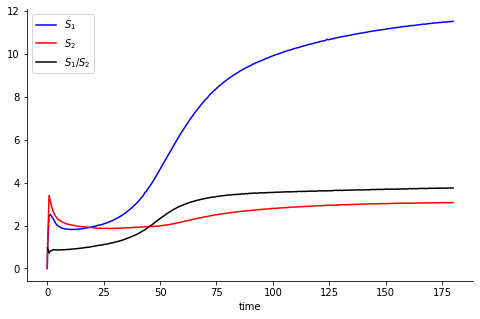

In [16]:
def iPlotCooperStandard(data, lineName, ID):
    t = data[lineName][ID]["time"]
    S1 = data[lineName][ID]["S1"]
    S2 = data[lineName][ID]["S2"]
    S1_S2 = data[lineName][ID]["S1_S2"]

    plt.figure(figsize=(8, 5))
    plt.plot(t, S1, color='blue', label=r'$S_1$')
    plt.plot(t, S2, color='red', label=r'$S_2$')
    plt.plot(t[1:], S1_S2, color='black', label=r'$S_1/S_2$')

    plt.xlabel('time')
    plt.legend()
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()


lineName = "NES170K07Line2"
ID = testNo
iPlotCooperStandard(data2, lineName, ID)

In [5]:
dfs[lineName]

,compound_process_id,compound_name,batch_number,start_time,end_time,mixer_batch_history_id,9,39,46,142,...,BUTTON DENSITY,RIBBON DENSITY,BUTTON HARDNESS,RIBBON HARDNESS,MDRTorqueS1,MDRTorqueS2,mixer_batch_history_id.2,MVTorqueS1,MVTorqueS2,mixer_batch_history_id.3
0,4610,NES-170K-07,4104895,2024-07-23 15:04:05,2024-07-23 15:07:09,1486524.0,7.0,0.26,-0.01,NaN,...,1.32,NaN,NaN,70.0,"[[0.0, 0.0], [0.2, 1.12], [0.8, 2.45], [1.4, 2...","[[0.0, 0.0], [0.2, 1.18], [0.8, 3.41], [1.4, 3...",1486524.0,"[[0.0, 0.0], [1.0, -0.1], [2.0, 11.9], [3.0, 2...",NaN,1486524.0
1,4610,NES-170K-07,4104896,2024-07-23 15:07:09,2024-07-23 15:10:16,1486526.0,7.0,0.26,0.01,NaN,...,1.30,NaN,NaN,70.0,"[[0.0, 0.0], [0.0, -1.78], [0.5, 1.67], [1.1, ...","[[0.0, 0.0], [0.0, -1.77], [0.5, 2.94], [1.1, ...",1486526.0,"[[0.0, 0.0], [1.0, -0.5], [2.0, 23.6], [3.0, 4...",NaN,1486526.0
2,4610,NES-170K-07,4104911,2024-07-23 16:45:54,2024-07-23 16:48:57,1486567.0,7.0,0.25,-0.01,NaN,...,NaN,NaN,NaN,NaN,"[[0.0, 0.0], [0.3, 1.0], [0.9, 2.19], [1.5, 2....","[[0.0, 0.0], [0.3, 0.87], [0.9, 3.55], [1.5, 3...",1486567.0,"[[0.0, 0.0], [1.0, -0.4], [2.0, 9.2], [3.0, 45...",NaN,1486567.0
3,4610,NES-170K-07,4104912,2024-07-23 16:48:57,2024-07-23 16:52:01,1486569.0,8.0,0.24,0.00,NaN,...,NaN,NaN,NaN,NaN,"[[0.0, 0.0], [0.0, -1.03], [0.6, 1.56], [1.2, ...","[[0.0, 0.0], [0.0, -1.72], [0.6, 2.78], [1.2, ...",1486569.0,"[[0.0, 0.0], [1.0, 10.2], [2.0, 22.6], [3.0, 3...",NaN,1486569.0
4,4610,NES-170K-07,4104922,2024-07-23 17:21:50,2024-07-23 17:25:11,1486587.0,8.0,0.24,0.00,NaN,...,NaN,NaN,NaN,NaN,"[[0.0, 0.0], [0.4, 1.41], [1.0, 1.88], [1.6, 2...","[[0.0, 0.0], [0.4, 2.71], [1.0, 3.18], [1.6, 3...",1486587.0,"[[0.0, 0.0], [1.0, 8.1], [2.0, 20.5], [3.0, 33...",NaN,1486587.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,4610,NES-170K-07,224013804,2025-01-02 07:53:25,2025-01-02 07:56:30,1568358.0,7.0,0.59,0.00,NaN,...,NaN,NaN,NaN,NaN,"[[0.0, 0.0], [0.1, 1.15], [0.7, 1.74], [1.3, 1...","[[0.0, 0.0], [0.1, -0.41], [0.7, 2.73], [1.3, ...",1568358.0,"[[0.0, 0.0], [1.0, 10.2], [2.0, 22.8], [3.0, 3...",NaN,1568358.0
13077,4610,NES-170K-07,224013806,2025-01-02 07:59:38,2025-01-02 08:02:46,1568361.0,7.0,0.62,0.01,NaN,...,NaN,NaN,NaN,NaN,"[[0.0, 0.0], [0.3, 0.75], [0.9, 1.29], [1.5, 1...","[[0.0, 0.0], [0.3, 1.56], [0.9, 2.2], [1.5, 2....",1568361.0,"[[0.0, 0.0], [1.0, 2.6], [2.0, 14.2], [3.0, 26...",NaN,1568361.0
13078,4610,NES-170K-07,224013818,2025-01-02 08:37:11,2025-01-02 08:40:19,1568384.0,7.0,0.60,-0.01,NaN,...,NaN,NaN,NaN,NaN,"[[0.0, 0.0], [0.1, 0.61], [0.7, 1.94], [1.3, 2...","[[0.0, 0.0], [0.1, -0.8], [0.7, 3.01], [1.3, 2...",1568384.0,"[[0.0, 0.0], [1.0, 0.6], [2.0, 12.6], [3.0, 25...",NaN,1568384.0
13079,4610,NES-170K-07,224013828,2025-01-02 09:08:35,2025-01-02 09:11:42,1568401.0,7.0,0.60,0.00,NaN,...,NaN,NaN,NaN,NaN,"[[0.0, 0.0], [0.0, 0.47], [0.6, 1.45], [1.2, 1...","[[0.0, 0.0], [0.0, -1.7], [0.6, 2.57], [1.2, 2...",1568401.0,"[[0.0, 0.0], [1.0, 0.2], [2.0, 11.5], [3.0, 24...",NaN,1568401.0
